<a href="https://colab.research.google.com/github/gauriagarwal18/Telecom-Churn-Analysis/blob/master/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

##We are using the following libraries:
- Numpy: We will use numpy arrays as they are comparitively faster than lists, also columns of dataframes behaves as numpy arrays

- Pandas: for reading the data from csv file, for data clening and for preparing data for analysis

- matplotlib,seabors: for different visualisations, for drawing conclusions from data and for exploratory data analysis. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Loading CSV file from google drive in colab enviroment
We will first load our csv file in which data is stored to the colab enviroment in data frame format so that we can make the copy of the orriginal data and perform the required cleaning and analysis.



I have first downloaded datasets automobile from UCI repository and performed the following steps in my project.
- Find the number of records which are noise free
- Clean data after removing noise

In [2]:
#Download datasets Hepatitis automobile from UCI repository
from google.colab import drive
drive.mount('/content/drive')
import os
path="/content/drive/My Drive/AlmaBetter_Capstone_projects/telecom_churn_analysis/TelecomChurn.csv"

telecom_original=pd.read_csv(path)
telecom= telecom_original.copy()

Mounted at /content/drive


#PROJECT DESCRIPTION:

The data set is a combination of different types of variables among which some are categorical variables some are discrete variables and some are continuous variables.

To make required analysis from the given raw data we have to perform following steps:

**step1 [Understanding the data deeply]**: Read the data thoroughly and understand the connections between different attributes

**step2 [Data Cleaning]**: This data is raw data so it contains lot of noise and null values so we  have to remove it for proper analysis with minimum or no error.

**step3 [Analysing and Concluding]**: After data cleaing, data is ready for further analysis, so we make required analysis and visulisation for various attributes of data and for required combinations of attributes of data.


In [3]:
telecom.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
telecom.describe(include="all")

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
def print_null_percent(df):
  null_percent=pd.Series()
  for col in df.columns:
    null_percent[col]=((df.shape[0]-df[col].count())/(df.shape[0]))*100
  print("columns with null values\n",null_percent[null_percent!=0])



In [7]:
def remove_outliers(df):

  continuous_col=df.describe().columns
  df.boxplot(rot=90)
  plt.title("before removing outliers",)
  plt.show()
  
  for c in continuous_col:
    df.index=np.arange(0,df.shape[0])
    Q1=np.quantile(df[c],0.25)
    Q3=np.quantile(df[c],0.75)
    IQR= Q3 - Q1
    upper=np.where(df[c]>=(Q3+1.5*IQR))[0]
    #print(upper[0])
    lower=np.where(df[c]<=(Q1-1.5*IQR))[0]   #it will be a tuple and we require a numpy array which is at it's first index.
    #print(lower)
    outliers_idx=np.unique(np.append(upper,lower)) 
    df.drop(outliers_idx, inplace = True) 
    
    #df.loc[upper][c]=Q3
    #df.loc[lower][c]=Q1
     
  df.boxplot(rot=90)
  plt.title("after removing outliers",)
  plt.show()
  return df

In [8]:
def normalization(df,col_list):

  for c1 in col_list:
    try:
      mx=df.max()[c1]
      mn=df.min()[c1]
      df[c1]=(df[c1]-mn)/(mx-mn)
      col_list.remove(c1)    #so that c1 do  not get normalized again and again
    except:
      print(f"{c1} is not a numerical column, so it can not be normalized")
      col_list.remove(c1)
      normalization(df,col_list)

In [9]:

def cleaning(df,discrete_col=[],print_null=True,th=20.0):
  """
  this function removes all the null values from the data 
  """

  continuous_col=df.describe().columns

  print(f"before cleaning\n")
  print(f"shape of data: {df.shape}")
  if(print_null):
    print_null_percent(df)
  
  #step1
  #preserving columns having at least 20% of not null values
  df.dropna(axis=1,inplace=True,thresh=((th/100.0)*df.shape[0]))
  #preserving rows having at least 20% of not null values
  df.dropna(axis=0,inplace=True,thresh=((th/100.0)*df.shape[1]))

  #step2
  df.drop_duplicates(inplace=True,ignore_index=True)
  

  #step3
  #removing all the null values
  for c1 in df.columns:

    #i.e it is an non catagorical column
    if c1 in continuous_col: 
      df[c1].fillna(df[c1].mean(),inplace=True)
    else:
      df[c1].fillna(df[c1].value_counts().idxmax(),inplace=True)

  print(f"\n\nAfter cleaning the data\n")
  print(f"shape of data: {df.shape}")
  print_null_percent(df)
  return df

In [10]:
#from this we can get to know that class don't have any null value so there is no need to drop 
telecom=cleaning(telecom,th=20)
#print_null_percent(automobiles)

before cleaning

shape of data: (3333, 20)
columns with null values
 Series([], dtype: float64)


After cleaning the data

shape of data: (3333, 20)
columns with null values
 Series([], dtype: float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


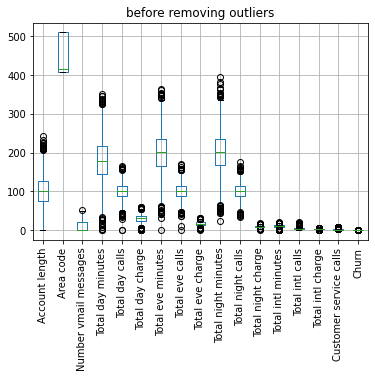

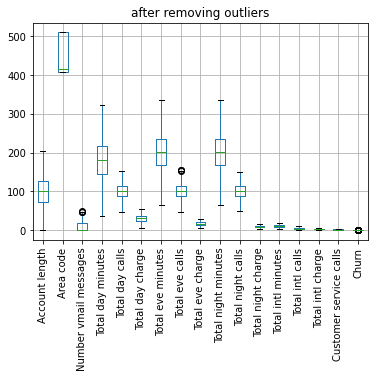

In [11]:
telecom=remove_outliers(telecom)

In [12]:
telecom.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

##reducing number of columns

###Removing multicollinearity

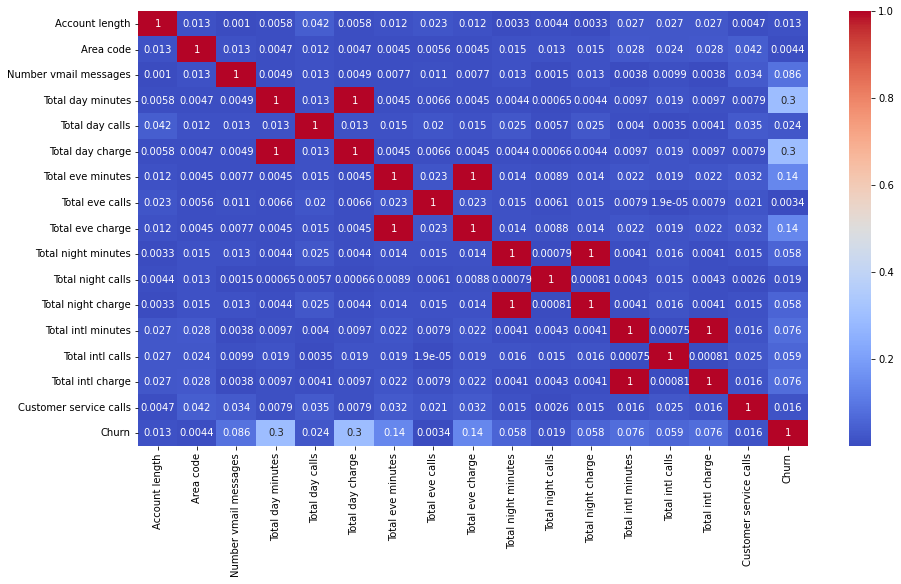

In [13]:
plt.figure(figsize=(15,8))
correlation = telecom.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [14]:
#for day, eve, night calls checking cost per minute:
intl=(telecom["Total intl charge"]/telecom['Total intl minutes']).agg(['mean'])
day=(telecom["Total day charge"]/telecom['Total day minutes']).agg(['mean'])
eve=(telecom["Total eve charge"]/telecom['Total eve minutes']).agg(['mean'])
night=(telecom["Total night charge"]/telecom['Total night minutes']).agg(['mean'])
print(f"for international calls:\n{intl}\n\n")
print(f"for day calls:\n{day}\n\n")
print(f"for evening calls:\n{eve}\n\n")
print(f"for night calls:\n{night}\n\n")

#we found that the cost per minute for each type of call is different so we have to treat them separately

for international calls:
mean    0.270058
dtype: float64


for day calls:
mean    0.170003
dtype: float64


for evening calls:
mean    0.085001
dtype: float64


for night calls:
mean    0.045
dtype: float64




In [15]:
#from above heat map we noticed a collinearity of one with minutes we talked and the charges so we remove these columns by cost/minute
telecom["intl cost per min"]=telecom["Total intl charge"]/telecom['Total intl minutes']
telecom["day cost per min"]=telecom["Total day charge"]/telecom['Total day minutes']
telecom["eve cost per min"]=telecom["Total eve charge"]/telecom['Total eve minutes']
telecom["night cost per min"]=telecom["Total night charge"]/telecom['Total night minutes']

#droping extra columns
telecom.drop(["Total intl charge","Total day charge","Total eve charge","Total night charge",
                   'Total intl minutes','Total day minutes','Total eve minutes','Total night minutes'],axis=1,inplace=True)

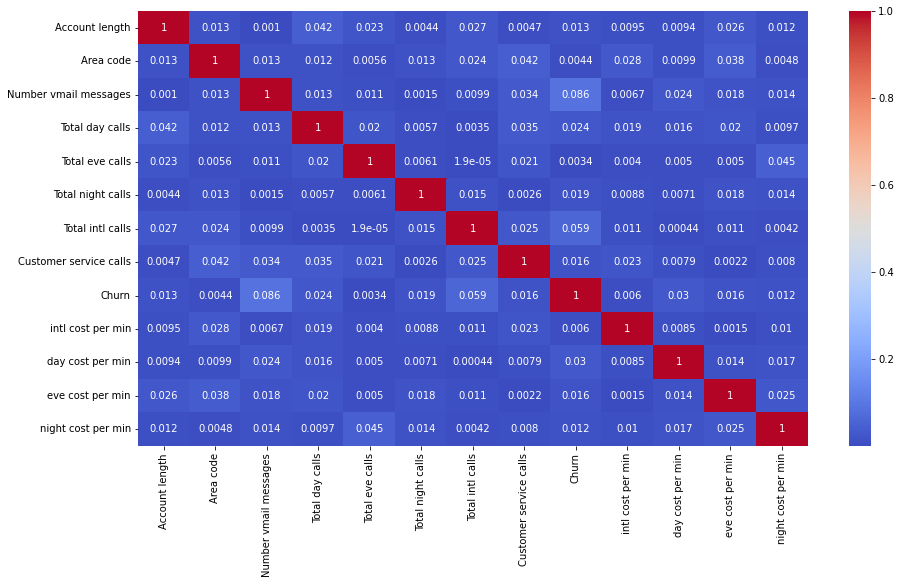

In [16]:
plt.figure(figsize=(15,8))
correlation = telecom.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
#multicollinearity is now removed

In [17]:
categorical_features = telecom.describe(include=['object','boolean']).columns
categorical_features

Index(['State', 'International plan', 'Voice mail plan', 'Churn'], dtype='object')

In [18]:
for i in telecom.columns:
  if i in categorical_features:
    print("\n",i,"\n",telecom[i].value_counts())


 State 
 WV    90
MN    76
WI    68
AL    67
OH    65
NY    65
CT    64
VA    63
OR    63
UT    62
NJ    61
NC    60
KS    60
TX    60
WA    59
MT    59
MS    59
VT    58
ID    58
MI    58
MA    58
MD    57
NV    57
WY    57
IN    57
RI    56
ND    55
AZ    53
SD    53
FL    53
KY    52
MO    52
NE    52
DE    51
CO    51
IL    51
ME    51
NM    50
OK    49
TN    48
DC    48
AK    46
SC    45
GA    44
HI    44
NH    44
AR    43
LA    42
PA    38
IA    36
CA    25
Name: State, dtype: int64

 International plan 
 No     2527
Yes     266
Name: International plan, dtype: int64

 Voice mail plan 
 No     2018
Yes     775
Name: Voice mail plan, dtype: int64

 Churn 
 False    2489
True      304
Name: Churn, dtype: int64


#Visualization

In [19]:
telecom.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day calls',
       'Total eve calls', 'Total night calls', 'Total intl calls',
       'Customer service calls', 'Churn', 'intl cost per min',
       'day cost per min', 'eve cost per min', 'night cost per min'],
      dtype='object')

In [20]:
def make_pieplot(data,y_axis,title = None):
  '''
  input
  data: Pandas series for pie plotting
  y_axis: column of pandas dataframe
  title: String value for plot title

  output 
  Display a pie chart  
  '''
  explode_list = data.value_counts().tolist()
  explode_ = [0 if elem != max(explode_list) else 0.01 for elem in explode_list]
  dict_data=data.value_counts()
  dict_data.plot(kind = 'pie', y = y_axis, autopct='%1.2f%%', figsize =(15,10),explode = explode_, fontsize = 10,legend=True,rot=45)
  #plt.legend(title ='market_segment',loc ='lower right')
  plt.title(title,bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)

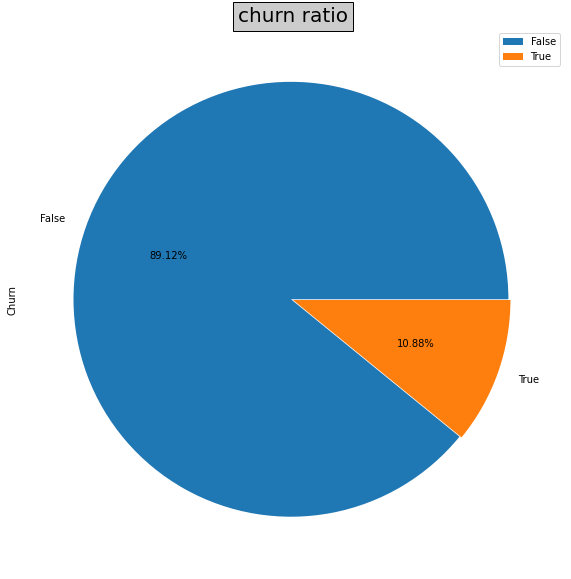

In [21]:
#ratio of users who churn
make_pieplot(telecom["Churn"],"Churn","churn ratio")

In [ ]:
#to normalize some columns
